<a href="https://colab.research.google.com/github/andrew-ryabchenko/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Multiple_Regression_(DS21%20Alex%20Lecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Regression

## Objectives

- Model the relationship of **multiple predictor variables** to a single outcome.
- Conduct a t-test to determine the **significance of individual variables** in the model.
- Compare model fit using **R-squared**

## Returning to our forensic science example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)? 




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, the date of death and burial (and therefore interment time) was known. This data is given in the `Longbones.csv` dataset. 

**We wish to determine if we can improve our model of the relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

In [1]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

#Drop records with NAs and rename the dataset longbones

longbones = df.dropna()

longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0
5,1,68.0,7.0,1,28.0,3.93,0
6,1,71.6,8.0,1,35.0,3.88,0
7,1,70.2,6.0,1,44.0,3.64,0


At the point we left off yesterday, we'd tested for and found a statisticaly significant relationship between long bone nitrogen composition and interment time.

The null hypothesis is that they are unrelated and the slope is = 0.  The alternative hypothesis is that they are related and the slope is not equal to 0.  In symbolic notation:

Ho: $\beta_1$ = 0

Ha: $\beta_1 \neq$ 0

In [2]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Time ~ Nitro', data=longbones).fit()

#Print the model summary
print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.96
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.05e-05
Time:                        16:08:42   Log-Likelihood:                -141.08
No. Observations:                  35   AIC:                             286.2
Df Residuals:                      33   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.8053     50.679      6.251      0.0

Today let's take a look at some of the information about model fit displayed in the upper right-hand side of the top box.

## R-squared ($R^2$)

**R-squared** (also abbreviated $R^2$) is equal to the square of the correlation coefficient.  It's a number between 0 and 1 that is often expressed as a percent.



The interpretation of R-squared is "the percent of the variability in the y variable that is explained by differences in the x variable(s)".  


In this case, $R^2$ = 0.45 = 45%.  The interpretation is that 45% of the variability in interment length is explained by differences in nitrogen composition of the long bones.



That means that 55% of the variability in interment time remains unexplained by the model.  

This remaining variability can be seen in the scatterplot where we have skeletons with the same nitrogen composition but different interment times.

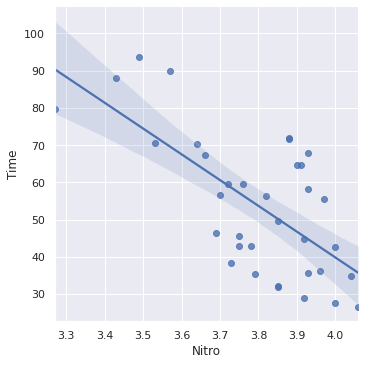

In [3]:
# Use Seaborn to create the scatterplot and overlay the regression line
import seaborn as sns

sns.set_theme()

ax = sns.lmplot(x='Nitro', y='Time', data=longbones)

## Multiple Regression

How do we address this unexplained variability?  

Well, one obvious place to start is to see if some of the other variables can help us understand why skeletons with the same nitrogen composition have different interment times.

We can do this by adding additional terms to our model and testing to see if they are statistically significant.


Simple linear regression model: $\hat{y} = \beta_0 + \beta_1x$

Multiple regression model: $\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 +...$

As with simple linear regression, we use t-tests to determine if model features are statistically significantly associated with the target. 


Let's start by looking at the `Lime` column, which indicates if the body was buried with quicklime or not.  


We can ask the question:

> **"Does burial with quicklime change the relationship between long bone nitrogen composition and interment time?"**

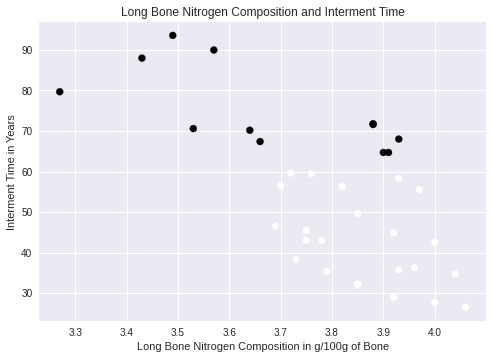

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig, ax = plt.subplots() 

#Color the points differently depending on if the body was buried with quicklime or not.
plt.scatter(x = longbones['Nitro'], y = longbones['Time'], c = longbones['Lime'])

ax.set_title('Long Bone Nitrogen Composition and Interment Time')
ax.set_xlabel('Long Bone Nitrogen Composition in g/100g of Bone')
ax.set_ylabel('Interment Time in Years')

plt.show()

There does seem to be a different pattern in the relationship between nitrogen composition and interment time depending on if the body was buried with quicklime, and we can test this claim formally using a hypothesis test.

Our multiple regression model is: $\hat{y} = \beta_0 + \beta_1$Nitro + $\beta_2$Lime

Now we can test the null hypothesis that burial with quicklime is not associated with interment time against the alternative hypothesis is that burial with quicklime is associated with interment time.  In symbolic notation:

$H_0$: $\beta_2$ = 0

$H_a$: $\beta_2 \neq$ 0

In [13]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Time ~ Nitro + Lime', data=longbones).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     55.56
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.90e-11
Time:                        16:29:06   Log-Likelihood:                -125.31
No. Observations:                  35   AIC:                             256.6
Df Residuals:                      32   BIC:                             261.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.4695     38.386      4.701      0.0

Now we see "Lime" appear in the model under Nitro alongside the model coefficient, standard error, t-test, p-value, and CI.

Both Nitro and Lime are statistically significant predictors of interment time so it makes sense to include both of them in our statistical model.

We can write the model using the coefficients shown in the table as:

$\hat{y}$ = 180.47 - 35.63 x Nitro + 25.45 x Lime



When we have a model with more than one feature, we talk about each one being significantly associated with the target *after taking into account the effects of the other variables*.

After taking into account long bone nitrogen composition, burial with quicklime is statistically significantly associated with interment time.

And vice versa.

After taking into account burial with quicklime, long bone nitrogen composition is statistically associated with interment time.

Because we now have two significant predictors in our model instead of just one, we'd expect the percent of variability in y to be higher for the model with both nitrogen composition and quicklime compared to the model with just nitrogen composition.

The output above gives us multiple measures comparing model predictive ability and fit, but we are going to continue to focus on $R^2$ (AIC, BIC and log-likelihood are all less easily interpretable measures of model fit).





However, regular old $R^2$ has one big problem. It will always go up when you enter more factors in the model, even if they aren't statistically significant.

Adjusted $R^2$ penalizes you just a little bit for adding in new model terms, so it will only increase if the new term really adds to the predictive ability of the model.

In the model with just nitrogen composition, adjusted $R^2$ = 0.433

In the model with both nitrogen composition and burial with quicklime, adjusted $R^2$ = 0.762

That's a huge increase in predictive ability!


Now we can say:

> **About 76 percent of the variability in interment time can be explained by differences in long bone nitrogen composition and use of the quicklime at burial.**

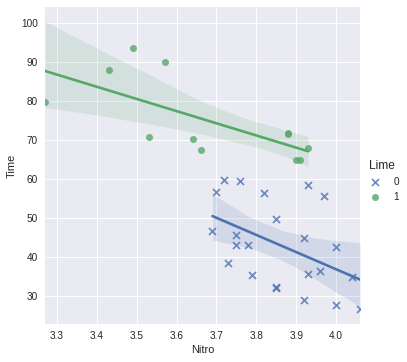

In [16]:
ax = sns.lmplot(x='Nitro', y='Time', data=longbones, hue='Lime',
                markers=['x', 'o'])

## Adding More Predictors

Can we do even better?????

Let's add burial depth to the model.

Our multiple regression model is: $\hat{y} = \beta_0 + \beta_1$Nitro + $\beta_2$Lime + $\beta_3$Depth

This time we want to test the null hypothesis that - after accounting for differences in nitrogen composition and burial with quicklime - burial depth is not associated with interment time against the alternative hypothesis is that burial depth is associated with interment time.  In symbolic notation:

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

### Visualizing

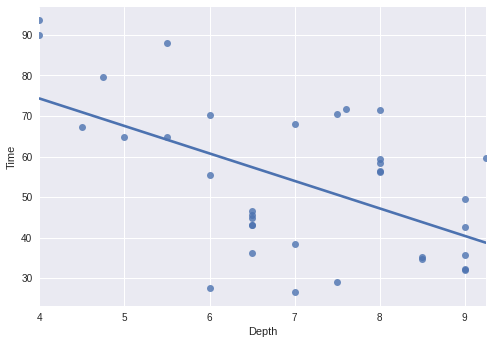

In [17]:
ax_depth = sns.regplot(x='Depth',y='Time', data=longbones, ci=None)

### Running Our Test

In [20]:
from statsmodels.formula.api import ols

model = ols('Time~ Nitro + Lime + Depth', data=longbones).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.34e-10
Time:                        16:56:30   Log-Likelihood:                -125.31
No. Observations:                  35   AIC:                             258.6
Df Residuals:                      31   BIC:                             264.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.4700     39.003      4.627      0.0

In this case, we see that we **fail to reject the null hypothesis** and we conclude that - after accounting for nitrogen composition and burial with quicklime - burial depth is not associated with interment time.

Looking at the adjusted $R^2$, we see the predictive ability of this model falls a tiny bit to 0.75.

We will choose not to include burial depth in our model of interment time.  Our current best model remains:

$\hat{y}$ = 180.47 - 35.63 x Nitro + 25.45 x Lime



### Your Turn: Let's Try Another!

We have one more variable to consider.  Let's add age at the time of death to the previous model and see if that adds to the predictive ability.

Our multiple regression model is: $\hat{y} = \beta_0 + \beta_1$Nitro + $\beta_2$Lime + $\beta_3$Age

This time we want to test the null hypothesis that - after accounting for differences in nitrogen composition and burial with quicklime - the age at the time of death is not associated with interment time against the alternative hypothesis is that age at the time of death is associated with interment time.  In symbolic notation:

Ho: $\beta_3$ = 0

Ha: $\beta_3 \neq$ 0

In [21]:
from statsmodels.formula.api import ols

model = ols('Time~ Nitro + Lime + Age', data=longbones).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     35.91
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.30e-10
Time:                        16:59:24   Log-Likelihood:                -125.30
No. Observations:                  35   AIC:                             258.6
Df Residuals:                      31   BIC:                             264.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    178.8066     40.704      4.393      0.0

Again we **fail to reject the null hypothesis** and we conclude that - after accounting for nitrogen composition and burial with quicklime - the age at the time of death is not associated with interment time.  The adjusted $R^2$ also decreases as when we added burial depth.

Based on the data we have, the best model to predict interment time of a skeleton is:

$\hat{y}$ = 180.47 - 35.63 x Nitro + 25.45 x Lime

In [25]:
 f = lambda x, y: 180.47 - 35.63*x + 25.45*y

## Making Our Final Prediction

Let's play CSI one more time and use it to make predictions about how long a body has been interred for different values of long bone nitrogen composition and quicklime application.

Case: A body found was **not buried with quicklime** and has **3.88g of nitrogen per 100g of bone** remaining in the long bones of the skeleton. Estimate the years that the body has been buried for.

In [ ]:
#Make sure we're working with the correct model
model = ols('Time ~ Nitro + Lime', data=longbones).fit()


#Specify the values of x we'd like to predict
x1 = 3.88
x2 = 0

#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope1 = model.params[1]
slope2 = model.params[2]

#Use the model coefficients and plug the new value of x into the regression equation
predicted = intercept + slope1*x1 + slope2*x2

print(predicted)


> **We estimate that this body has been buried for about 42.24 years.**

Case: A body that was **buried with quicklime** and has **3.59 g of nitrogen per 100g of bone** remaining in the long bones of the skeleton.

In [27]:
f(3.59,1)

78.00829999999999

> **[Estimate here]**



---



What happens if I have a lot - like thousands - of potential features?

There are many, many machine learning algorithms that have been built to evaluate the most important features of a dataset, and you will learn several of the most common ones as you move throughout the units of the data science curriculum.

However, at a very basic level, they all work the same way we did today by evaluating how much information a particular feature contributes to the model.